<a href="https://colab.research.google.com/github/Ryansyaaw/PCVK_Ganjil_23/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from math import log10, sqrt
import glob

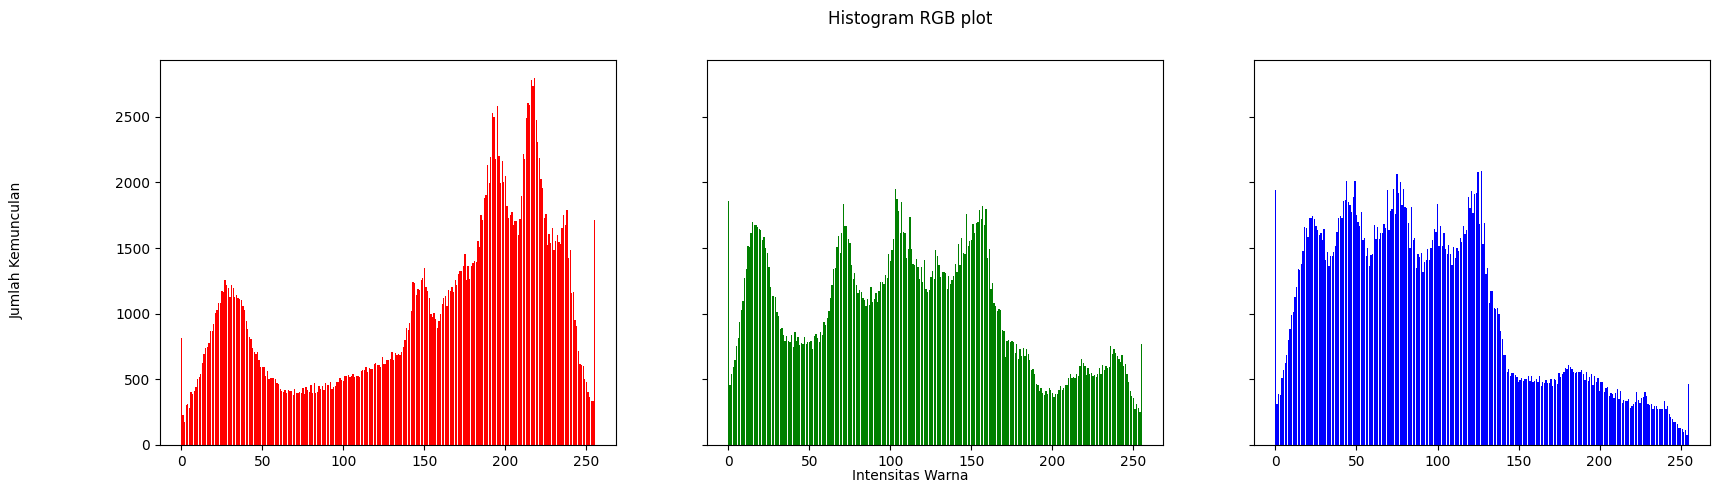

In [3]:

img_1 = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

height, width, _ = img_1.shape  # Menggunakan _ untuk mengabaikan kedalaman warna

blue = [0] * 256
green = [0] * 256
red = [0] * 256

for y in range(height):
    for x in range(width):
        blue[img_1[y, x, 0]] += 1
        green[img_1[y, x, 1]] += 1
        red[img_1[y, x, 2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

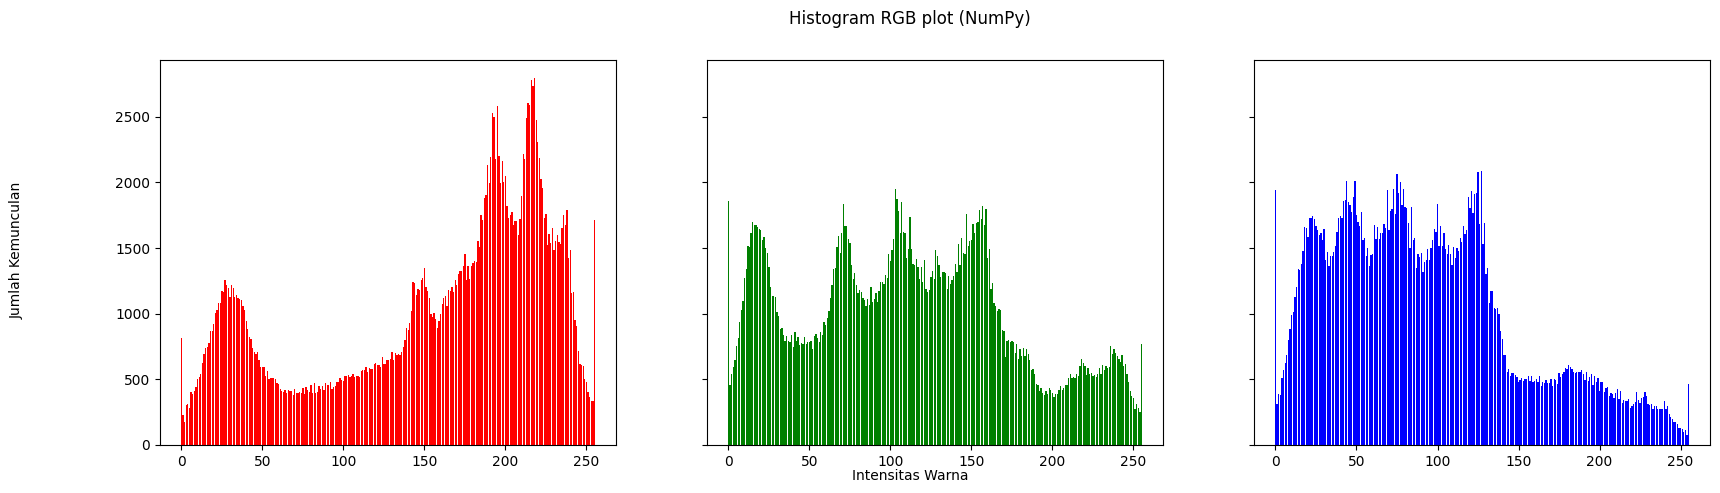

In [4]:

img_1 = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

hist_blue, _ = np.histogram(img_1[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(img_1[:, :, 1], bins=256, range=(0, 256))
hist_red, _ = np.histogram(img_1[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')

plt.show()

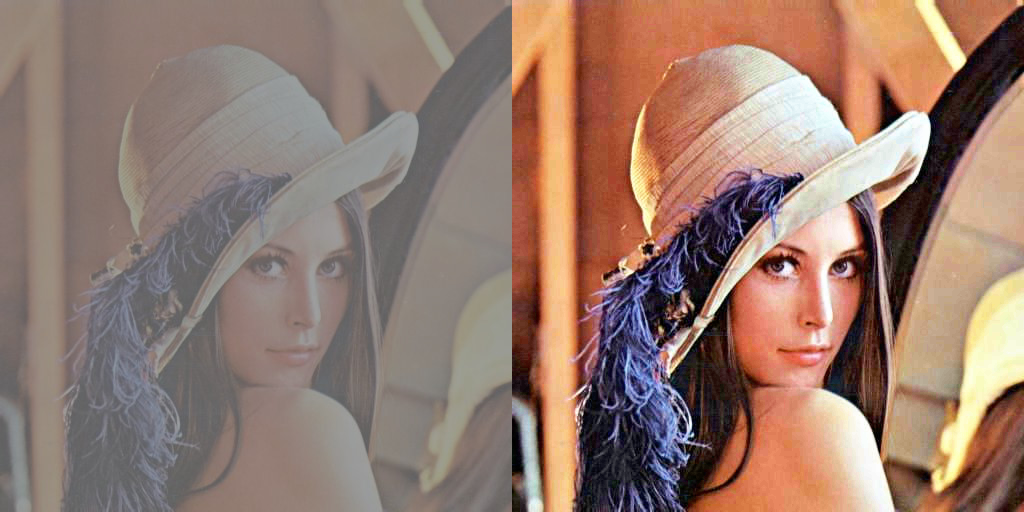

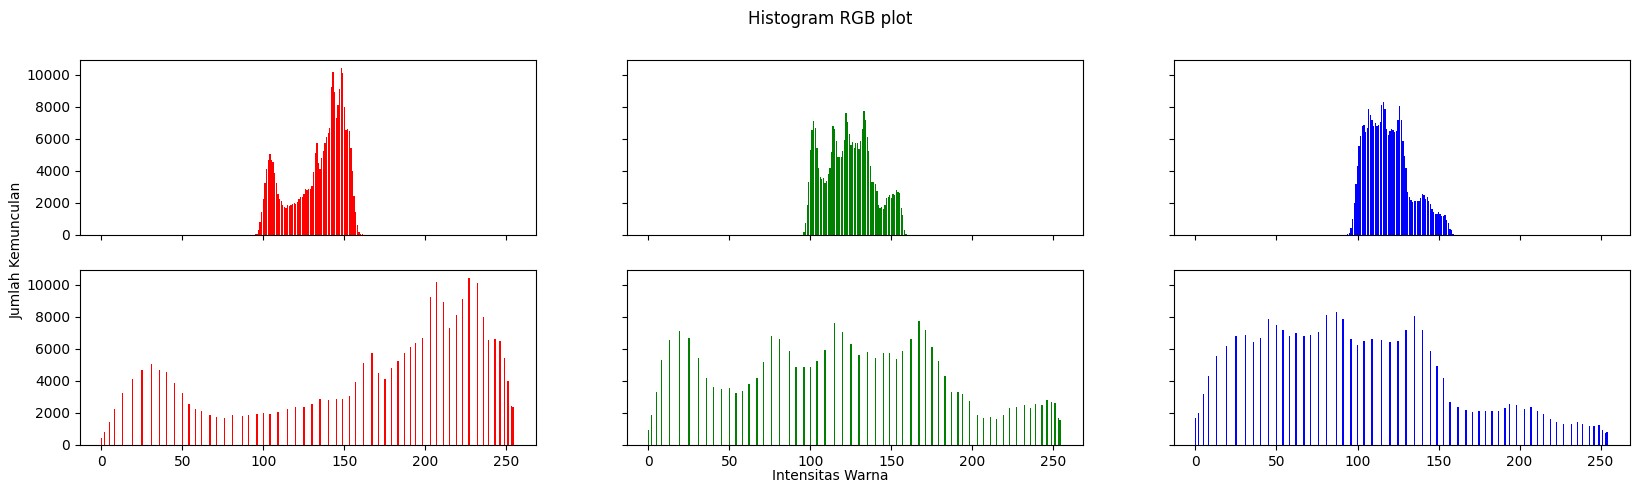

In [5]:
img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

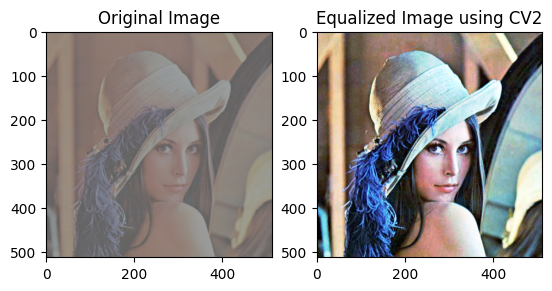

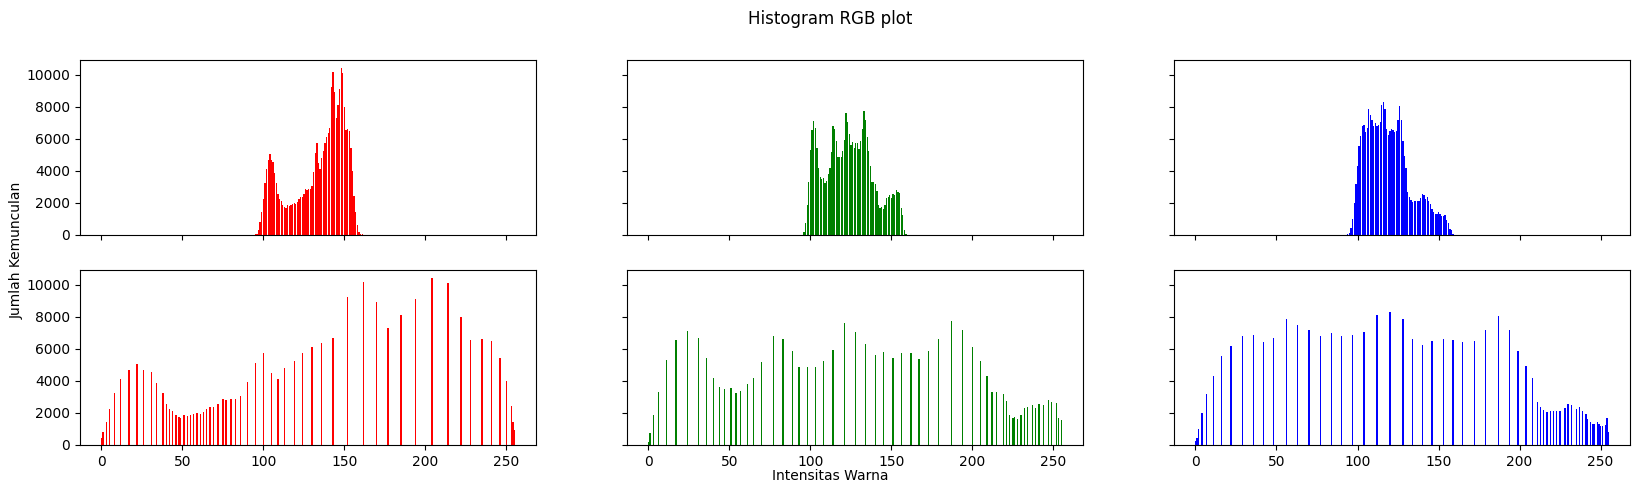

In [8]:
img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
img_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

# Separate R, G, and B channels
r, g, b = cv.split(img_rgb)

# equalization on each channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Recombine the channels
img_equalized = cv.merge([r_eq, g_eq, b_eq])

# Show result
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(img_equalized)
plt.title("Equalized Image using CV2")

plt.show()

r_hist_np, r_bins_np = np.histogram(img_rgb[:, :, 0], bins=256, range=[0, 256])
g_hist_np, g_bins_np = np.histogram(img_rgb[:, :, 1], bins=256, range=[0, 256])
b_hist_np, b_bins_np = np.histogram(img_rgb[:, :, 2], bins=256, range=[0, 256])

# Calculating histograms for equalized images
r_hist_eq, r_bins_eq = np.histogram(r_eq.flatten(), bins=256, range=[0, 256])
g_hist_eq, g_bins_eq = np.histogram(g_eq.flatten(), bins=256, range=[0, 256])
b_hist_eq, b_bins_eq = np.histogram(b_eq.flatten(), bins=256, range=[0, 256])

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0,0].bar(names, r_hist_np, color='red')
axs[0,1].bar(names, g_hist_np, color='green')
axs[0,2].bar(names, b_hist_np, color='blue')
axs[1,0].bar(names, r_hist_eq, color='red')
axs[1,1].bar(names, g_hist_eq, color='green')
axs[1,2].bar(names, b_hist_eq, color='blue')


plt.show()

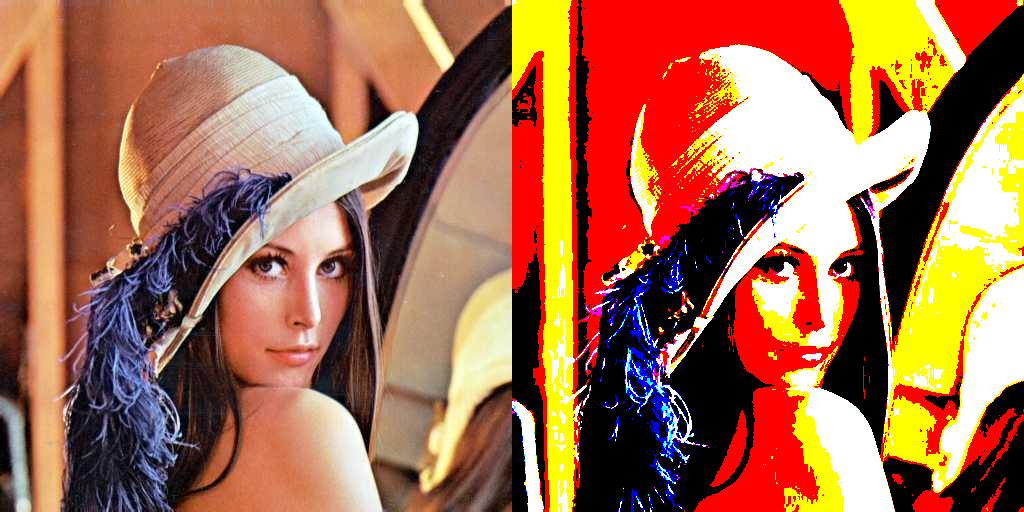

In [11]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_5 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_6 = np.zeros(img_5.shape, img_5.dtype)

for y in range(0, img_5.shape[0]):
  for x in range(0, img_5.shape[1]):
    baru = warnaTerdekat(img_5[y, x, 0], img_5[y, x, 1], img_5[y, x, 2])
    img_6[y, x] = warnaPallette[baru]

img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_6 = cv.cvtColor(img_6, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_5, img_6))
cv2_imshow(final_frame)

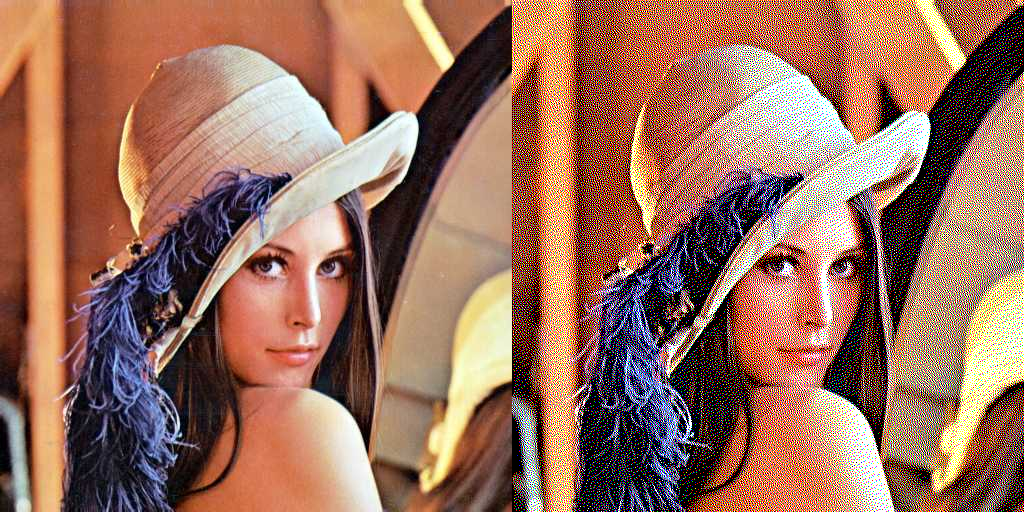

In [13]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Convert to float
img_float = np.float64(img)

# Image size
height, width, channels = img.shape

#  Floyd and Steinberg dithering process on each color channel
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop for every color channel (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Convert back to uint8 type
output_img = np.uint8(img_float)

# Displays the initial image and dithering results
final_frame = cv.hconcat((img, output_img))
cv2_imshow(final_frame)

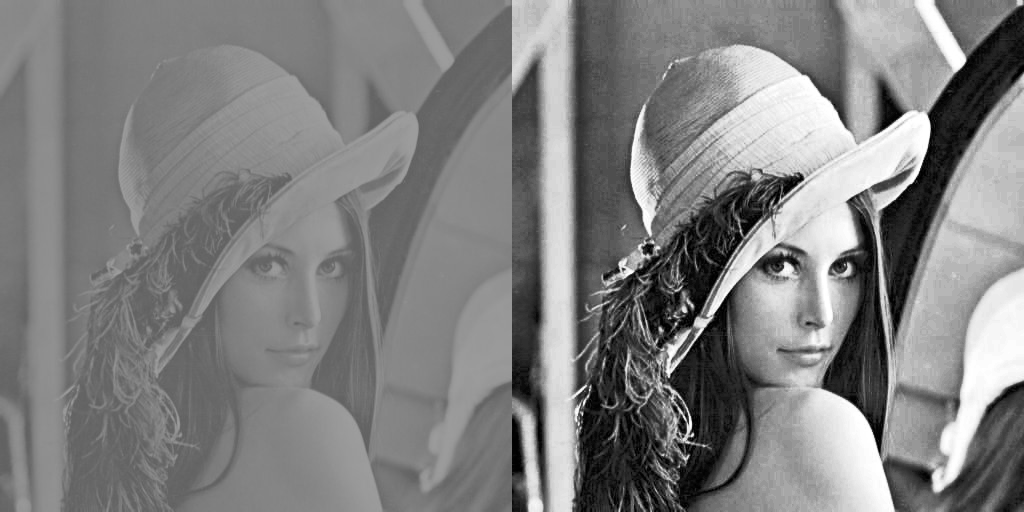

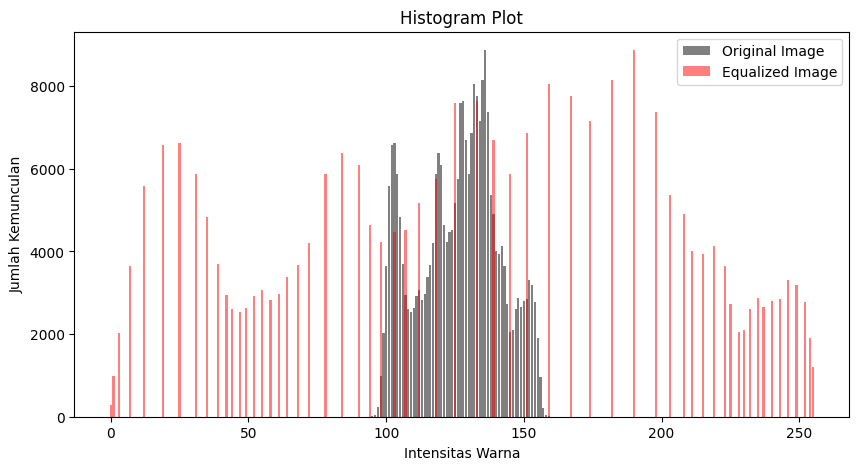

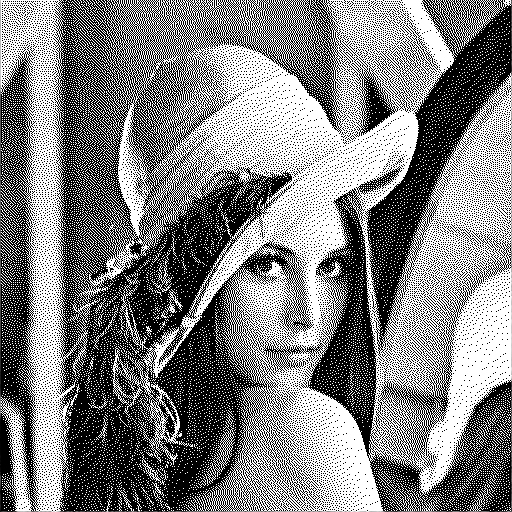

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membuka citra dan mengkonversi ke grayscale
img_lc = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
img_gray = cv.cvtColor(img_lc, cv.COLOR_BGR2GRAY)
img_ori = cv.cvtColor(img_lc, cv.COLOR_BGR2RGB)

# Melakukan equalization pada gambar grayscale
img_equalized = cv.equalizeHist(img_gray)

# MENAMPILKAN GAMBAR
concatenated_img = cv.hconcat([img_gray, img_equalized])
cv2_imshow(concatenated_img)

# Implementasikan proses dithering Floyd-Steinberg
height, width = img_equalized.shape[0], img_equalized.shape[1]
dithered_image = np.copy(img_equalized)

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg_dithering(img):
    height, width = img.shape
    for y in range(height - 1): # Karena kita membutuhkan tetangga y+1
        for x in range(1, width - 1): # Karena kita membutuhkan tetangga x-1 dan x+1
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y, x + 1] = threshold(img[y, x + 1] + error * 7/16)
            img[y + 1, x - 1] = threshold(img[y + 1, x - 1] + error * 3/16)
            img[y + 1, x] = threshold(img[y + 1, x] + error * 5/16)
            img[y + 1, x + 1] = threshold(img[y + 1, x + 1] + error * 1/16)
    return img

dithered_img = floyd_steinberg_dithering(img_equalized.copy())

# Menghitung histogram untuk citra asli dan hasil equalisasi
hist_np, bins_np = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
hist_eq, bins_eq = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])

names = np.arange(256)
plt.figure(figsize=(10,5))
plt.title('Histogram Plot')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(names, hist_np, color='gray', label='Original Image')
plt.bar(names, hist_eq, color='red', alpha=0.5, label='Equalized Image')
plt.legend()
plt.show()

cv2_imshow(dithered_img)